### Custom Dataset Generator

	import numpy as np
	import pandas as pd
	rng = np.random.default_rng(42)

	def generate_students(n=200, seed=42):
 		rng = np.random.default_rng(seed)
 		hours_studied = rng.normal(5, 2, n).clip(1, 10)
 		marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
 		gender = rng.choice(['Male', 'Female'], n)
 		subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
 		study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
 		attempts = rng.integers(1, 4, n)
 		return pd.DataFrame({
     			'hours_studied': hours_studied.round(2),
     			'marks': marks.round(2),
     			'gender': gender,
     			'subject': subject,
     			'study_method': study_method,
     			'attempts': attempts
 	})

	def generate_daily_sales(n=60, seed=42):
 		rng = np.random.default_rng(seed)
 		base = pd.date_range(start='2024-01-01', periods=n, freq='D')
 		trend = np.linspace(50, 80, n)
 		season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
 		noise = rng.normal(0, 3, n)
 		sales = (trend + season + noise).round(2)
 		return pd.DataFrame({'date': base, 'sales': sales})

### Example usage
###### students = generate_students(220)
###### sales = generate_daily_sales(90)

### Problems
1. Using sales, draw a lineplot of date vs sales.
2. From students, plot hours_studied vs marks and color by gender.
3. Create a grid of scatterplots (hours_studied vs marks) faceted by subject.
4. Plot a histogram of marks with a KDE overlay.
5. Show the KDE curve for hours_studied.
6. Display the count of records per subject.
7. Draw a regression line for hours_studied and marks.
8. Create a pairplot and a jointplot for students' dataset.
9. Make a scatter plot of hours_studied vs marks using Plotly, colored by gender.
10. Draw a line chart of sales over date and a histogram of marks using Plotly.




In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
  rng = np.random.default_rng(seed)
  hours_studied = rng.normal(5, 2, n).clip(1, 10)
  marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
  gender = rng.choice(['Male', 'Female'], n)
  subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
  study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
  attempts = rng.integers(1, 4, n)
  return pd.DataFrame({
      'hours_studied': hours_studied.round(2),
      'marks': marks.round(2),
      'gender': gender,
      'subject': subject,
      'study_method': study_method,
      'attempts': attempts
    })

def generate_daily_sales(n=60, seed=42):
  rng = np.random.default_rng(seed)
  base = pd.date_range(start='2024-01-01', periods=n, freq='D')
  trend = np.linspace(50, 80, n)
  season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
  noise = rng.normal(0, 3, n)
  sales = (trend + season + noise).round(2)
  return pd.DataFrame({'date': base, 'sales': sales})

In [54]:
students = generate_students(220)
sales = generate_daily_sales(90)

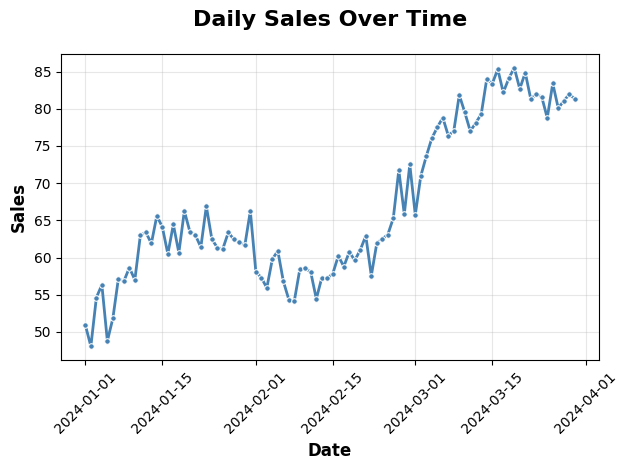

In [55]:
sns.lineplot(data=sales, x='date', y='sales', linewidth=2, color='steelblue', marker='o', markersize=4)
plt.title('Daily Sales Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Sales', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

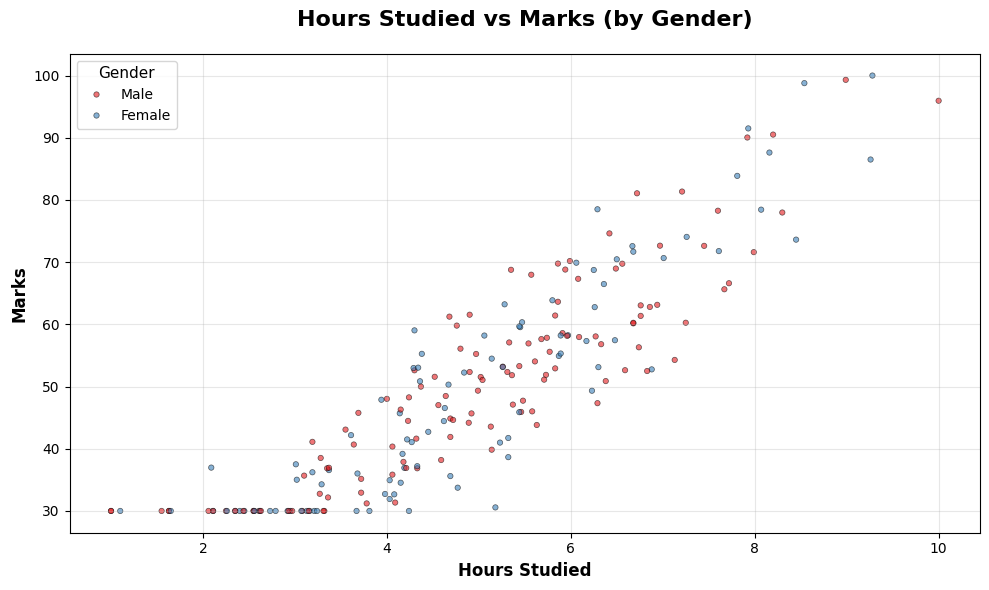

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=students, x='hours_studied', y='marks', hue='gender', s=15, alpha=0.6, palette='Set1', edgecolor='black', linewidth=0.5)
plt.title('Hours Studied vs Marks (by Gender)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hours Studied', fontsize=12, fontweight='bold')
plt.ylabel('Marks', fontsize=12, fontweight='bold')
plt.legend(title='Gender', title_fontsize=11, fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

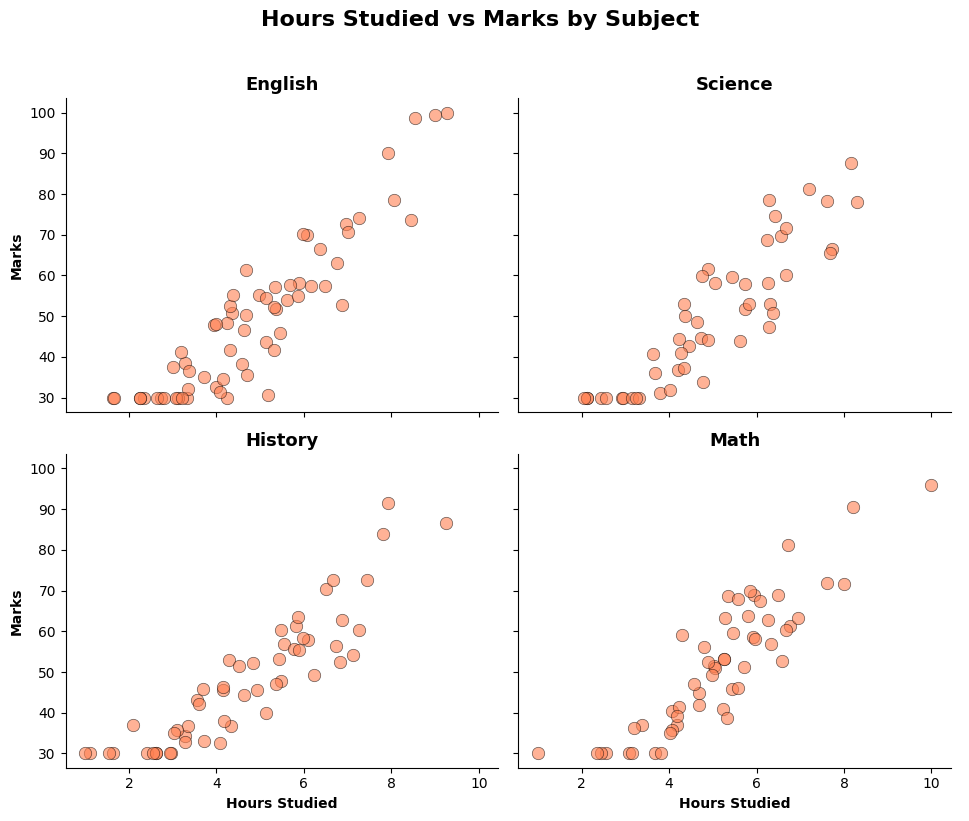

In [57]:
g = sns.FacetGrid(students, col='subject', col_wrap=2, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='hours_studied', y='marks', alpha=0.6, edgecolor='black', linewidth=0.5, s=80, color='coral')
g.set_axis_labels('Hours Studied', 'Marks', fontweight='bold')
g.set_titles(col_template="{col_name}", fontweight='bold', size=13)
g.fig.suptitle('Hours Studied vs Marks by Subject', fontsize=16, fontweight='bold', y=1.02)
g.add_legend()
plt.tight_layout()
plt.show()

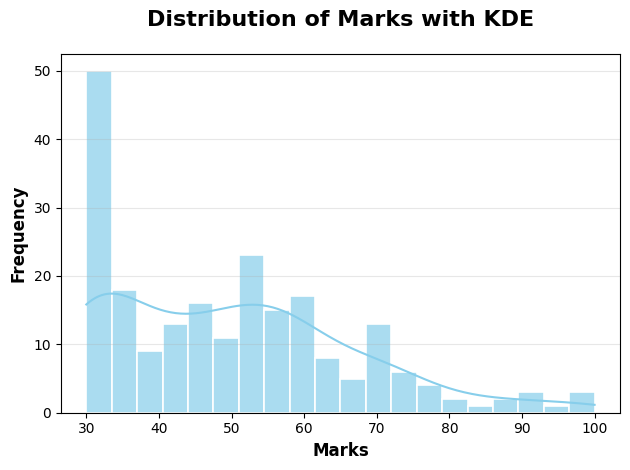

In [58]:
sns.histplot(data=students, x='marks', bins=20, kde=True, color='skyblue', edgecolor='w', linewidth=1.2, alpha=0.7)
plt.title('Distribution of Marks with KDE', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Marks', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

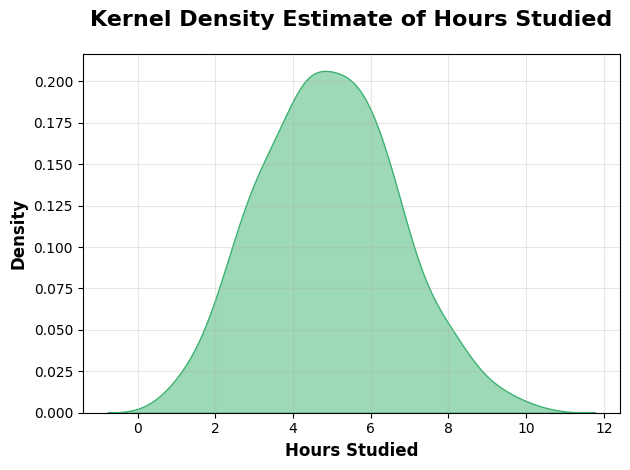

In [59]:
sns.kdeplot(data=students, x='hours_studied', fill=True, color='mediumseagreen', linewidth=1, alpha=0.5)
plt.title('Kernel Density Estimate of Hours Studied', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hours Studied', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

/tmp/ipython-input-3342776727.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=students, x='subject', palette='viridis', edgecolor='black', linewidth=1)


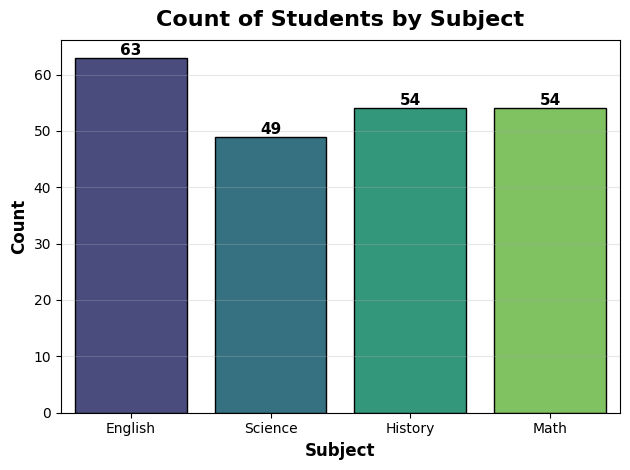

In [60]:
sns.countplot(data=students, x='subject', palette='viridis', edgecolor='black', linewidth=1)
plt.title('Count of Students by Subject', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Subject', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

# Add count labels on bars
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fontweight='bold', fontsize=11)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

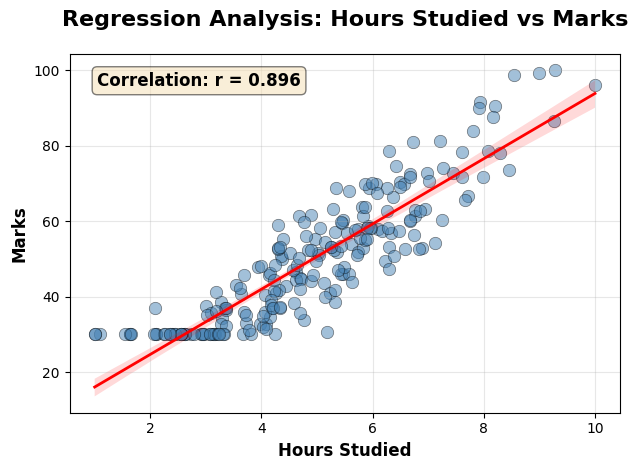

In [61]:
sns.regplot(data=students, x='hours_studied', y='marks', scatter_kws={'alpha': 0.5, 's': 80, 'edgecolors': 'black', 'linewidths': 0.5}, line_kws={'color': 'red', 'linewidth': 2}, color='steelblue')
plt.title('Regression Analysis: Hours Studied vs Marks', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hours Studied', fontsize=12, fontweight='bold')
plt.ylabel('Marks', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Calculate and display correlation
correlation = students['hours_studied'].corr(students['marks'])
plt.text(0.05, 0.95, f'Correlation: r = {correlation:.3f}', transform=plt.gca().transAxes, fontsize=12, fontweight='bold', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()


In [62]:
numeric_cols = ['hours_studied', 'marks', 'attempts']

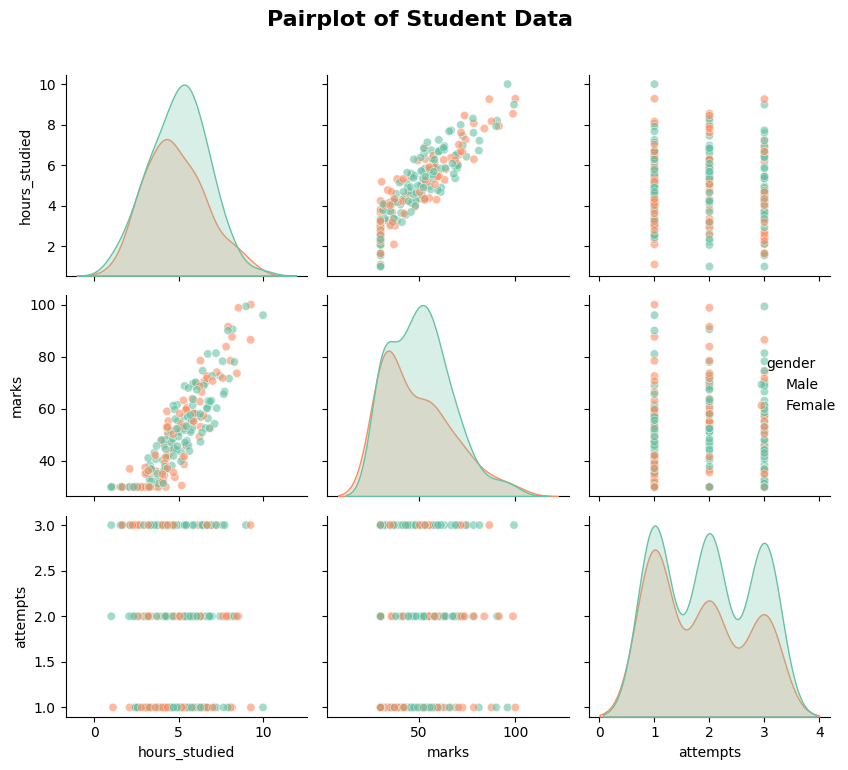

In [51]:
pairplot = sns.pairplot(students[numeric_cols + ['gender']], hue='gender', palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
pairplot.fig.suptitle('Pairplot of Student Data', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

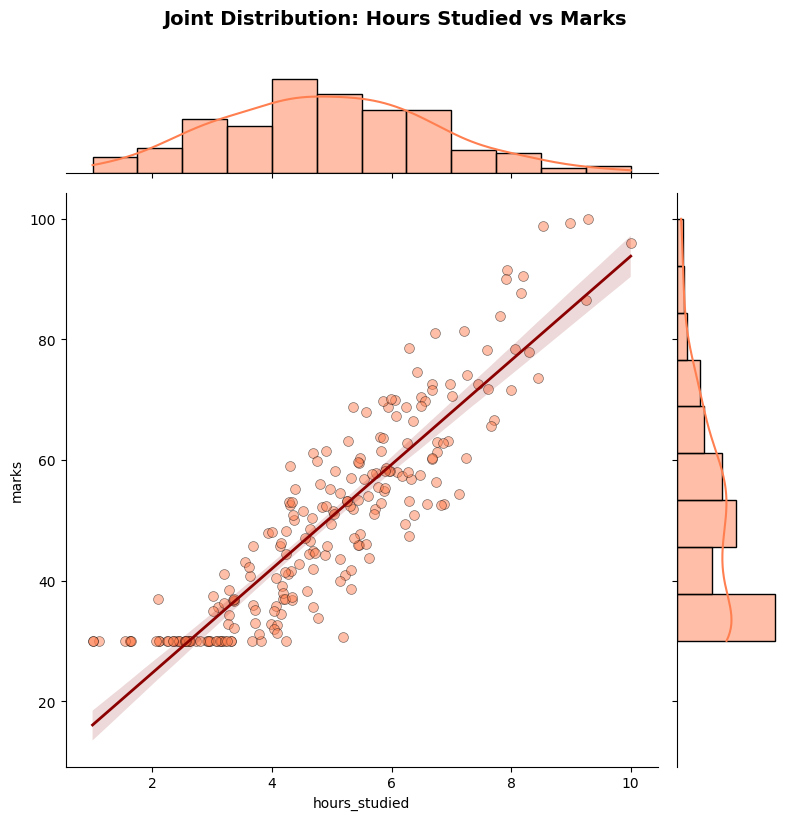

In [63]:
jointplot = sns.jointplot(data=students, x='hours_studied', y='marks', kind='reg', height=8, color='coral', scatter_kws={'alpha': 0.5, 's': 50, 'edgecolors': 'black', 'linewidths': 0.5}, line_kws={'color': 'darkred', 'linewidth': 2})
jointplot.fig.suptitle('Joint Distribution: Hours Studied vs Marks', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [64]:
fig = px.scatter(students, x='hours_studied', y='marks',
                 color='gender', title='Hours Studied vs Marks by Gender (Interactive)',
                 labels={'hours_studied': 'Hours Studied', 'marks': 'Marks'},
                 color_discrete_map={'Male': '#1f77b4', 'Female': '#ff7f0e'},
                 hover_data=['subject', 'study_method', 'attempts'])

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=12,
    font=dict(size=12),
    hovermode='closest',
    plot_bgcolor='rgba(240,240,240,0.5)',
    height=600
)

In [69]:
fig1 = px.line(sales, x='date', y='sales', title='Daily Sales Over Time (Interactive)', labels={'date': 'Date', 'sales': 'Sales'})

fig1.update_traces(line=dict(color='steelblue', width=3), mode='lines+markers', marker=dict(size=6, color='darkblue', line=dict(width=1, color='white')))

fig1.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    font=dict(size=12),
    hovermode='x unified',
    plot_bgcolor='rgba(240,240,240,0.5)',
    height=600
)

In [70]:
fig2 = px.histogram(students, x='marks', nbins=25, title='Distribution of Student Marks (Interactive)', labels={'marks': 'Marks', 'count': 'Frequency'}, color_discrete_sequence=['indianred'])

fig2.update_traces(marker=dict(line=dict(color='darkred', width=1.5)))

fig2.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    font=dict(size=12),
    bargap=0.1,
    plot_bgcolor='rgba(240,240,240,0.5)',
    height=600,
    showlegend=False
)